# Evaluaci√≥n Parcial - CIFAR-100 con PyTorch
Este notebook implementa un MLP entrenado sobre el dataset CIFAR-100 con GPU.

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)


Usando dispositivo: cuda


In [8]:
# Transformaciones: convertir a tensor y normalizar
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Cargar CIFAR-100
trainset = torchvision.datasets.CIFAR100(
    root='./data', train=True, download=True, transform=transform)

testset = torchvision.datasets.CIFAR100(
    root='./data', train=False, download=True, transform=transform)

# DataLoaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


In [9]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)  # Entrada: imagen 32x32 con 3 canales
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 100)  # Salida: 100 clases

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Crear instancia y mover a GPU si est√° disponible
model = MLP().to(device)
print(model)


MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=100, bias=True)
)


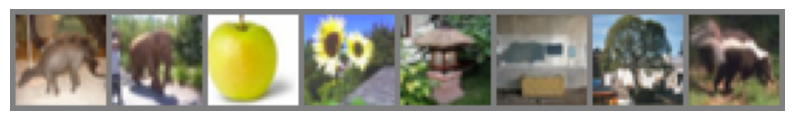

Etiquetas: ['dinosaur', 'elephant', 'apple', 'sunflower', 'lamp', 'couch', 'oak_tree', 'skunk']


In [11]:
# Clases de CIFAR-100
classes = trainset.classes

# Funci√≥n para mostrar im√°genes
def imshow(img):
    img = img / 2 + 0.5  # desnormalizar
    npimg = img.numpy()
    plt.figure(figsize=(10, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Obtener algunas im√°genes del dataloader
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Mostrar las im√°genes
imshow(torchvision.utils.make_grid(images[:8]))
print('Etiquetas:', [classes[label] for label in labels[:8]])


In [12]:
# Definir funci√≥n de p√©rdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento
num_epochs = 10
train_loss_history = []

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()
    
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Reset gradientes
        optimizer.zero_grad()

        # Forward + backward + optimizaci√≥n
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    train_loss_history.append(epoch_loss)
    print(f"√âpoca {epoch+1}/{num_epochs}, P√©rdida: {epoch_loss:.4f}")

print("Entrenamiento finalizado ‚úÖ")


√âpoca 1/10, P√©rdida: 3.7393
√âpoca 2/10, P√©rdida: 3.3460
√âpoca 3/10, P√©rdida: 3.1601
√âpoca 4/10, P√©rdida: 3.0011
√âpoca 5/10, P√©rdida: 2.8606
√âpoca 6/10, P√©rdida: 2.7268
√âpoca 7/10, P√©rdida: 2.6073
√âpoca 8/10, P√©rdida: 2.4666
√âpoca 9/10, P√©rdida: 2.3491
√âpoca 10/10, P√©rdida: 2.2286
Entrenamiento finalizado ‚úÖ


In [13]:
correct = 0
total = 0
model.eval()  # Modo evaluaci√≥n

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Precisi√≥n en el conjunto de prueba: {accuracy:.2f}%")


Precisi√≥n en el conjunto de prueba: 23.32%


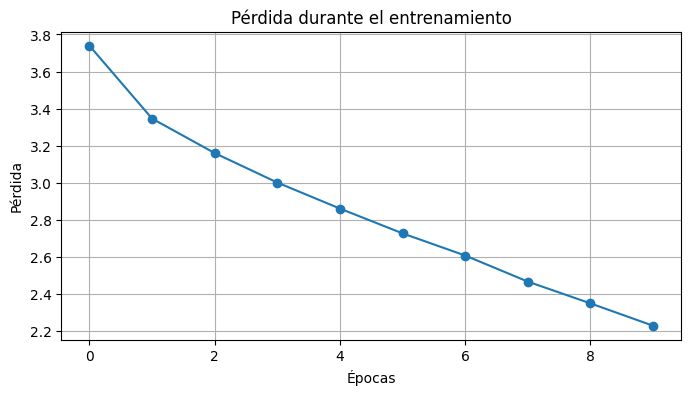

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(train_loss_history, marker='o')
plt.title('P√©rdida durante el entrenamiento')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida')
plt.grid(True)
plt.show()


In [16]:
# üîÅ Versi√≥n alternativa con batch size = 12
trainloader_v2 = DataLoader(trainset, batch_size=12, shuffle=True)
testloader_v2 = DataLoader(testset, batch_size=12, shuffle=False)


In [17]:
class MLP_2capas_2neuronas(nn.Module):
    def __init__(self):
        super(MLP_2capas_2neuronas, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 2)
        self.fc2 = nn.Linear(2, 2)
        self.fc3 = nn.Linear(2, 100)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [18]:
# üß† Usar el nuevo modelo
model_v2 = MLP_2capas_2neuronas().to(device)

# üßÆ Funci√≥n de p√©rdida y optimizador
criterion_v2 = nn.CrossEntropyLoss()
optimizer_v2 = optim.Adam(model_v2.parameters(), lr=0.001)


In [19]:
epochs_v2 = 30
train_loss_history_v2 = []

for epoch in range(epochs_v2):
    running_loss = 0.0
    model_v2.train()
    
    for inputs, labels in trainloader_v2:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer_v2.zero_grad()
        outputs = model_v2(inputs)
        loss = criterion_v2(outputs, labels)
        loss.backward()
        optimizer_v2.step()

        running_loss += loss.item()
    
    epoch_loss = running_loss / len(trainloader_v2)
    train_loss_history_v2.append(epoch_loss)
    print(f"[V2] √âpoca {epoch+1}/{epochs_v2}, P√©rdida: {epoch_loss:.4f}")


[V2] √âpoca 1/30, P√©rdida: 4.6072
[V2] √âpoca 2/30, P√©rdida: 4.5257
[V2] √âpoca 3/30, P√©rdida: 4.4897
[V2] √âpoca 4/30, P√©rdida: 4.4683
[V2] √âpoca 5/30, P√©rdida: 4.4545
[V2] √âpoca 6/30, P√©rdida: 4.4441
[V2] √âpoca 7/30, P√©rdida: 4.4362
[V2] √âpoca 8/30, P√©rdida: 4.4284
[V2] √âpoca 9/30, P√©rdida: 4.4222
[V2] √âpoca 10/30, P√©rdida: 4.4170
[V2] √âpoca 11/30, P√©rdida: 4.4120
[V2] √âpoca 12/30, P√©rdida: 4.4080
[V2] √âpoca 13/30, P√©rdida: 4.4042
[V2] √âpoca 14/30, P√©rdida: 4.4010
[V2] √âpoca 15/30, P√©rdida: 4.3976
[V2] √âpoca 16/30, P√©rdida: 4.3946
[V2] √âpoca 17/30, P√©rdida: 4.3927
[V2] √âpoca 18/30, P√©rdida: 4.3902
[V2] √âpoca 19/30, P√©rdida: 4.3882
[V2] √âpoca 20/30, P√©rdida: 4.3852
[V2] √âpoca 21/30, P√©rdida: 4.3843
[V2] √âpoca 22/30, P√©rdida: 4.3825
[V2] √âpoca 23/30, P√©rdida: 4.3813
[V2] √âpoca 24/30, P√©rdida: 4.3793
[V2] √âpoca 25/30, P√©rdida: 4.3776
[V2] √âpoca 26/30, P√©rdida: 4.3762
[V2] √âpoca 27/30, P√©rdida: 4.3746
[V2] √âpoca 28/30, P√©rdida: 4.3736
[

In [20]:
correct_v2 = 0
total_v2 = 0
model_v2.eval()

with torch.no_grad():
    for inputs, labels in testloader_v2:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_v2(inputs)
        _, predicted = torch.max(outputs, 1)
        total_v2 += labels.size(0)
        correct_v2 += (predicted == labels).sum().item()

accuracy_v2 = 100 * correct_v2 / total_v2
print(f"[V2] Precisi√≥n en test: {accuracy_v2:.2f}%")


[V2] Precisi√≥n en test: 2.64%


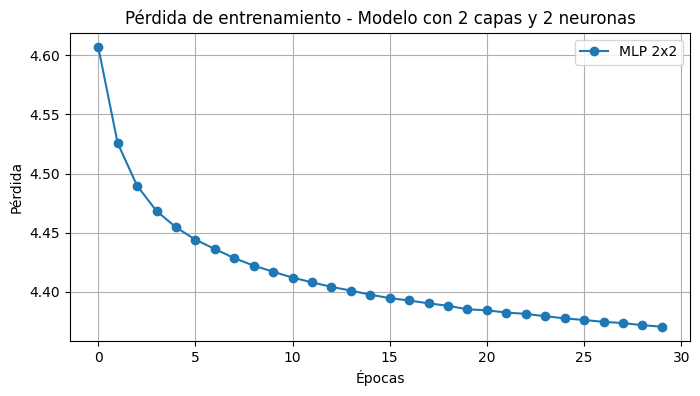

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(train_loss_history_v2, label="MLP 2x2", marker='o')
plt.title("P√©rdida de entrenamiento - Modelo con 2 capas y 2 neuronas")
plt.xlabel("√âpocas")
plt.ylabel("P√©rdida")
plt.legend()
plt.grid(True)
plt.show()
